In [2]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
#!C:/Users/sdk19/anaconda3/python -m pip install xgboost
#!C:/Users/sdk19/anaconda3/python -m pip install plotly    
#!C:/Users/sdk19/anaconda3/python -m pip install sklearn.cross_validation
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

from subprocess import check_output
#!apt-get install libgomp1 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from matplotlib import pyplot
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy.random import seed

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb


In [3]:

df=pd.read_csv("completeData8.csv",encoding='mac_roman')
df.head()

,Unnamed: 0,high_booking_rate,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,host_sinceD,market,property_type,review_scores_ratingOG,topic,price_score,Area,bins,rating_score,{randomControl}
0,1,0,4,26,19,67,29,29,2.0,Real Bed,...,359.0,Miami,Apartment,90,6,73,23,2,15,113890
1,2,0,4,19,0,0,0,0,1.0,Real Bed,...,2090.0,New York,Apartment,98,17,87,15,1,58,116337
2,3,0,4,18,0,0,0,0,1.0,Real Bed,...,2260.0,Los Angeles,House,99,3,56,39,1,60,112297
3,4,0,2,11,24,173,54,84,2.5,Real Bed,...,778.0,Minneapolis,Townhouse,20,2,8,22,1,1,125404
4,5,0,2,12,4,64,34,64,1.0,Real Bed,...,440.0,Los Angeles,House,100,5,84,18,1,73,112921


In [4]:
#dff=pd.read_csv("completeData2.csv",encoding='mac_roman')
#dff.head()
df3=pd.read_csv("completeTestData2.csv",encoding='mac_roman')
df3.head()

,Unnamed: 0,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,amenities_Treadmill,host_sinceD,market,property_type,review_scores_ratingOG,Area,bins,price_score,rating_score,topic
0,1,1,20,27,361,57,87,1.0,Real Bed,1,...,0,1290.0,Los Angeles,House,93,18,1,28,27,0
1,2,3,18,0,1,0,0,1.0,Real Bed,1,...,0,1822.0,Miami,House,98,23,1,17,56,0
2,3,2,22,5,245,14,25,1.0,Real Bed,1,...,0,2501.0,The Big Island,Guest suite,100,7,1,11,79,19
3,4,2,20,0,0,0,0,1.0,Real Bed,0,...,0,1624.0,San Diego,Apartment,100,30,1,91,82,15
4,5,2,9,0,0,0,0,1.0,Real Bed,1,...,0,2079.0,Seattle,House,100,46,1,27,85,17


Creating dummy columns for categorical columns of both training and testing data

In [5]:
df3=df3.iloc[:,1:]
df3 = df3.drop('review_scores_rating', 1)
df3=pd.get_dummies(df3, columns=[ 'bed_type','cancellation_policy','host_has_profile_pic','host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time','instant_bookable',
                                 'is_location_exact','require_guest_phone_verification','require_guest_profile_picture','requires_license', 'room_type', 'market', 'property_type','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','topic','bins','Area','review_scores_value'])
#df2=pd.get_dummies(df2, columns=[ 'cancellation_policy','host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time', 'room_type', 'market', 'property_type','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','topic'])

In [6]:
df2=df.iloc[:,1:]
df2 = df2.drop('review_scores_rating', 1)
df2=pd.get_dummies(df2, columns=[ 'bed_type','cancellation_policy','host_has_profile_pic','host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time','instant_bookable',
                                 'is_location_exact','require_guest_phone_verification','require_guest_profile_picture','requires_license', 'room_type', 'market', 'property_type','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value'
,'topic','bins','Area'])

#df2=pd.get_dummies(df2, columns=[ 'bed_type','cancellation_policy','host_has_profile_pic','host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time','instant_bookable',
#                                 'is_location_exact','require_guest_phone_verification','require_guest_profile_picture','requires_license', 'room_type', 'market', 'property_type','topic','bins','Area'])



#df2=pd.get_dummies(df2, columns=[ 'cancellation_policy','host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time', 'room_type', 'market', 'property_type','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','topic'])

Renaming training and test datasets

In [7]:
X_train=df2.drop('high_booking_rate', 1)
y_train=df2['high_booking_rate']
X_test=df3

Creating untunned xgboost model for shortlisting important features.

In [8]:
from numpy.random import seed
mlp = XGBClassifier(seed=42,verbose=True)
mlp.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbose=True,
              verbosity=None)

Sorting columns according to feature importance from xgboost.

In [9]:
#fscore = mlp.best_estimator_.booster().get_fscore()
sorted_idx = np.argsort(mlp.feature_importances_)[::-1]
count=1
col_names=[]
for index in sorted_idx:
    print(count,[X_train.columns[index], mlp.feature_importances_[index]]) 
    col_names.append(X_train.columns[index])
    count=count+1


1 ['host_is_superhost_TRUE', 0.14447111]
2 ['review_scores_value_medium', 0.08434792]
3 ['review_scores_checkin_high', 0.0723559]
4 ['review_scores_accuracy_high', 0.03077895]
5 ['review_scores_value_high', 0.027872413]
6 ['review_scores_ratingOG', 0.027493183]
7 ['amenities_"Self check-in"', 0.026101973]
8 ['review_scores_checkin_medium', 0.0226714]
9 ['amenities_"Hot water"', 0.019800983]
10 ['amenities_"Coffee maker"', 0.017909545]
11 ['amenities_"Family/kid friendly"', 0.01732288]
12 ['host_is_superhost_FALSE', 0.017318059]
13 ['host_response_time_within an hour', 0.016312983]
14 ['amenities_"translation missing: en.hosting_amenity_50"', 0.013060003]
15 ['host_response_rate_unknown', 0.011206152]
16 ['amenities_"translation missing: en.hosting_amenity_49"', 0.0091285305]
17 ['amenities_"Bedroom comforts"', 0.008357264]
18 ['review_scores_communication_medium', 0.008351697]
19 ['host_listings_count', 0.0076994346]
20 ['amenities_Internet', 0.007175032]
21 ['property_type_Guest suite

195 ['cancellation_policy_strict_14_with_grace_period', 0.00089880894]
196 ['amenities_"Childrenís books and toys"', 0.00089362764]
197 ['amenities_"Room-darkening shades"', 0.000892162]
198 ['amenities_"Accessible-height toilet"', 0.00088744395]
199 ['amenities_Crib', 0.00088632305]
200 ['amenities_"Electric profiling bed"', 0.0008772286]
201 ['Area_33', 0.0008640807]
202 ['amenities_toilet"', 0.0008619024]
203 ['amenities_"Pocket wifi"', 0.00085276965]
204 ['bins_3', 0.00085220777]
205 ['amenities_"Patio or balcony"', 0.00085066736]
206 ['beds', 0.0008331735]
207 ['property_type_Other', 0.00083180284]
208 ['topic_17', 0.00082245964]
209 ['amenities_"Handheld shower head"', 0.0008205723]
210 ['amenities_"Fixed grab bars for shower"', 0.00081586326]
211 ['Area_35', 0.0008155307]
212 ['room_type_Hotel room', 0.0008146815]
213 ['topic_15', 0.0008116069]
214 ['amenities_"Smart lock"', 0.0008075273]
215 ['Area_34', 0.00080701016]
216 ['amenities_"Beach essentials"', 0.0007858037]
217 ['bed

Using just top 285 important columns according to feature important.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,1:], df2['high_booking_rate'], random_state=42)
df_new = X_train[col_names[:285]]

X_test2=X_test[list(df_new)]
#df_new.head()
#df_new_test = X_test[col_names[:120]]
#df_new.head()
X_test2
df_new_test=X_test2
X_test=df_new_test
X_train=df_new

## parameter tunning
### Learning rate and n_estimators

In [10]:
param_test1 = {
 'learning_rate':[0.01,0.05,0.10,0.15,0.20,0.25],
 'n_estimators':[500,700,1000,1200,1400,1500,1700]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(scale_pos_weight=2.61, seed=42,verbose=True), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 583.88682707,  802.82598233, 1166.80305068, 1433.31632765,
         1600.37407851, 1713.46820052, 1937.57878288,  570.55467852,
          796.28323038, 1136.90775657, 1363.49388242, 1590.45010098,
         1702.55376116, 1927.61271826,  569.78682494,  794.81109111,
         1134.69968613, 1361.56975961, 1586.6384813 , 1700.93101962,
         1929.82838122,  568.91457836,  796.62827547, 1133.3175923 ,
         1363.14173428, 1587.93012842, 1649.70505047, 1855.77240745,
          546.94404324,  765.14640649, 1092.11185193, 1309.72701597,
         1530.19878999, 1641.12656029, 1855.88519382,  547.13357337,
          764.31616863, 1091.82879559, 1309.44300167, 1526.95234227,
         1637.64146368, 1584.81103897]),
  'std_fit_time': array([  1.10486404,   6.05008145,  26.28883627,   7.96477106,
           1.50115266,   2.19681263,   1.34674783,   1.09189318,
           0.40964733,   1.21906128,   0.81523644,   2.19692481,
           0.48329598,   1.56467685,   0.

From the tuning the best learning rate is 0.05 at 1700 n_estimators. To increase the auc furthur lower learning rate and higher n_estimators combinations can be tried.

### min_child_weight and max_depth
Using the above tunned leaning rate and n_estimator to tune min_child_weight and max_depth

In [12]:
param_test1 = {
 'min_child_weight':[1,2,3,4,5,6],
 'max_depth':[2,4,6,7,8]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(scale_pos_weight=2.61, seed=42,n_estimators=1700,learning_rate=0.05,verbose=True), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
#gsearch2.fit(X_train,y_train)
#gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
grid_result = gsearch2.fit(X_train, y_train)

In [14]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results

Best: 0.950530 using {'max_depth': 7, 'min_child_weight': 4}
0.941559 (0.000662) with: {'max_depth': 2, 'min_child_weight': 1}
0.941593 (0.000557) with: {'max_depth': 2, 'min_child_weight': 2}
0.941600 (0.000595) with: {'max_depth': 2, 'min_child_weight': 3}
0.941629 (0.000558) with: {'max_depth': 2, 'min_child_weight': 4}
0.941596 (0.000626) with: {'max_depth': 2, 'min_child_weight': 5}
0.941789 (0.000506) with: {'max_depth': 2, 'min_child_weight': 6}
0.948392 (0.000540) with: {'max_depth': 4, 'min_child_weight': 1}
0.948464 (0.000318) with: {'max_depth': 4, 'min_child_weight': 2}
0.948473 (0.000392) with: {'max_depth': 4, 'min_child_weight': 3}
0.948713 (0.000283) with: {'max_depth': 4, 'min_child_weight': 4}
0.948604 (0.000193) with: {'max_depth': 4, 'min_child_weight': 5}
0.948666 (0.000329) with: {'max_depth': 4, 'min_child_weight': 6}
0.949752 (0.000405) with: {'max_depth': 6, 'min_child_weight': 1}
0.949823 (0.000341) with: {'max_depth': 6, 'min_child_weight': 2}
0.949780 (0.000

There has been increase in training auc(0.950).The best values are max_depth=7 and min_child_weight=4

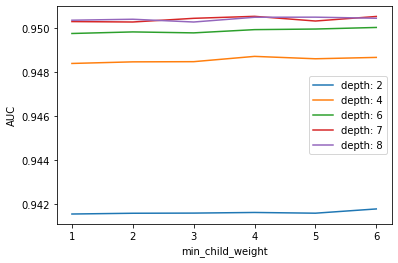

In [15]:
max_depth=[2,4,6,7,8]
min_child_weight=[1,2,3,4,5,6]
scores = np.array(means).reshape(len(max_depth), len(min_child_weight))
for i, value in enumerate(max_depth):
    pyplot.plot(min_child_weight, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('min_child_weight')
pyplot.ylabel('AUC')
pyplot.savefig('min_child_weight vs_max_depth.png')

This graphical visualization shows that increasing depth generally increases the auc(more tree better results).But peak was for second highest depth of 7 for min child weight of 4.

In [16]:
#seed(2)
mlp = XGBClassifier(scale_pos_weight=2.61, seed=42,n_estimators=1700,learning_rate=0.05,min_child_weight=4,max_depth=7)
mlp.fit(X_train,y_train)
pred6=mlp.predict(X_test)
print("Modelo 6 neural net",mlp.score(X_test,y_test))

probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)

Modelo 6 neural net 0.8790437490105019
AUC: 0.9515


Auc on test data is 95.15 with above tunned parameters. Parameter tunning for the project was done on entire train data, but for the purpose of this notebook I have split the train data into train and test.

### gamma

In [20]:
param_test1 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( max_depth=7,
 min_child_weight=4,
 objective= 'binary:logistic', scale_pos_weight=2.61, seed=42,n_estimators=1700,learning_rate=0.05,min_child_weight=4,max_depth=7), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [19]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2118.74570791, 2122.09651065, 2120.21854258, 2121.21690075,
         1716.43201033]),
  'std_fit_time': array([ 2.54991761,  0.70104673,  0.71823438,  0.3402881 , 29.58762467]),
  'mean_score_time': array([4.71210988, 5.53630535, 5.41697152, 5.54980834, 2.99957371]),
  'std_score_time': array([0.83900077, 0.29805903, 0.61813024, 0.40167704, 0.32573392]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.9502011 , 0.95016912, 0.95027793, 0.94980543, 0.95007811]),
  'split1_test_score': array([0.95099434, 0.95100261, 0.95090898, 0.95102608, 0.95072542]),
  'split2_test_score': array([0.95039512, 0.95024394, 0.95038152, 0.95065724, 0.95050122]),
  'mean_test_score': array([0.95053019, 0.95047189, 0.95052281

gamma 0 ,which is default parameter value is the best.

### subsample and colsample_bytree

In [23]:
param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( max_depth=7,
 min_child_weight=4,
 objective= 'binary:logistic', scale_pos_weight=2.61, seed=42,n_estimators=1700,learning_rate=0.05,gamma=0), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_delta_step=None,
                                     max_depth=7, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=170...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=2.61,
                                     seed=42, subsample=None, tree_m

In [24]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1517.80121072, 1560.57705386, 1571.3845017 , 1516.35370533,
         1673.68825897, 1692.81899587, 1685.97389325, 1656.96202342,
         1811.32009037, 1821.33343053, 1815.21176561, 1806.06085531,
         1988.8742667 , 2002.78725608, 1999.04388698, 1957.87839691]),
  'std_fit_time': array([17.08843233, 35.17996665, 33.56513422,  1.57314081,  2.05426337,
          3.69779463, 18.71620904,  0.73856065,  0.91031828, 11.93001935,
          6.36262953,  2.13509743,  1.99860922, 12.60677229, 11.00723791,
         25.68344156]),
  'mean_score_time': array([4.90152947, 4.57490571, 4.55126254, 4.15608557, 4.20296653,
         4.97545036, 4.64245621, 4.42094024, 5.38116558, 5.14954797,
         4.55159728, 4.61241015, 4.29149   , 4.74690652, 4.75749707,
         3.90016373]),
  'std_score_time': array([0.43520426, 0.08048311, 0.25211498, 0.01780867, 0.07438681,
         0.52324615, 0.69139043, 0.58337526, 0.84065648, 0.69918281,
         0.72527648, 0.77605558, 0.066

After three fold cross validation and gridsearch best colsample_bytree is 0.6 and subsample value is 0.9

In [25]:
#seed(2)
mlp = XGBClassifier(scale_pos_weight=2.61, seed=42,n_estimators=1700,learning_rate=0.05,min_child_weight=4,max_depth=7,subsample=0.9,colsample_bytree=0.6)
mlp.fit(X_train,y_train)
pred6=mlp.predict(X_test)
print("Modelo 6 neural net",mlp.score(X_test,y_test))

probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)

Modelo 6 neural net 0.8803894664626102
AUC: 0.9527


After using all the tunned parameter values final auc obtained was 0.9527. It can be increased furthur by increasing n_estimators and reducing learning rate but it can be very time consuming to train the model.